In [ ]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.chdir("./drive/My Drive/Data/")

In [ ]:
ls

kaggle_songs.txt                        MSDChallengeGettingstarted.pdf
kaggle_users.txt                        taste_profile_song_to_tracks.txt
kaggle_visible_evaluation_triplets.txt  unique_tracks.txt


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series,DataFrame, read_table
from sklearn.metrics import mean_squared_error

from datetime import datetime

In [ ]:
songs = pd.read_csv("kaggle_songs.txt", sep=" ",header=None)
users = pd.read_csv('kaggle_users.txt', dtype = 'str')
triplet = pd.read_csv('kaggle_visible_evaluation_triplets.txt', header = None, delimiter = "\t")
taste_track = pd.read_csv('taste_profile_song_to_tracks.txt', header = None, delimiter = "\t", error_bad_lines=False)
unique_tracks = pd.read_csv('unique_tracks.txt', header = None, delimiter = '<SEP>')
print("\n Data read succesfully!!")

b'Skipping line 100: expected 2 fields, saw 3\nSkipping line 1366: expected 2 fields, saw 3\nSkipping line 1965: expected 2 fields, saw 3\nSkipping line 2633: expected 2 fields, saw 3\nSkipping line 4604: expected 2 fields, saw 3\nSkipping line 6107: expected 2 fields, saw 3\nSkipping line 6243: expected 2 fields, saw 3\nSkipping line 6977: expected 2 fields, saw 3\nSkipping line 7757: expected 2 fields, saw 3\nSkipping line 8451: expected 2 fields, saw 3\nSkipping line 8507: expected 2 fields, saw 3\nSkipping line 8657: expected 2 fields, saw 3\nSkipping line 9025: expected 2 fields, saw 3\nSkipping line 9360: expected 2 fields, saw 3\nSkipping line 9655: expected 2 fields, saw 3\nSkipping line 9803: expected 2 fields, saw 3\nSkipping line 10390: expected 2 fields, saw 3\nSkipping line 10480: expected 2 fields, saw 3\nSkipping line 11272: expected 2 fields, saw 3\nSkipping line 12554: expected 2 fields, saw 3\nSkipping line 13587: expected 2 fields, saw 3\nSkipping line 13737: expecte


 Data read succesfully!!


In [ ]:
songs.columns=["song_id","Serial_Number"] 

In [ ]:
songs.head() 

,song_id,Serial_Number
0,SOAAADD12AB018A9DD,1
1,SOAAADE12A6D4F80CC,2
2,SOAAADF12A8C13DF62,3
3,SOAAADZ12A8C1334FB,4
4,SOAAAFI12A6D4F9C66,5


In [ ]:
songs.shape

(386213, 2)

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386213 entries, 0 to 386212
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   song_id        386213 non-null  object
 1   Serial_Number  386213 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ MB


In [ ]:
users.columns=["user_id"]

In [ ]:
users.head()

,user_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b
1,d68dc6fc25248234590d7668a11e3335534ae4b4
2,9be82340a8b5ef32357fe5af957ccd54736ece95
3,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8
4,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109999 entries, 0 to 109998
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  109999 non-null  object
dtypes: object(1)
memory usage: 859.5+ KB


In [ ]:
unique_tracks.head()

,0,1,2,3
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
unique_tracks.columns = ["track_id","song_id","singer","song_name"]

In [ ]:
unique_tracks.head()

,track_id,song_id,singer,song_name
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
triplet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1450933 non-null  object
 1   1       1450933 non-null  object
 2   2       1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [ ]:
triplet.head()

,0,1,2
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
triplet.columns = ["user_id","song_id","song_count"]

In [ ]:
triplet.head()

,user_id,song_id,song_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
taste_track.head()

,0,1
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17


In [ ]:
taste_track.columns = ["song_id","track_id"]
taste_track.head()

,song_id,track_id
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17


#### Handling dupicate values

In [ ]:
print(sum(triplet.duplicated()))

0


In [ ]:
triplet.isnull().sum()

user_id       0
song_id       0
song_count    0
dtype: int64

In [ ]:

triplet.dropna(axis='columns')
triplet.dropna(how='all')

,user_id,song_id,song_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


#### Merging the tables

In [ ]:
songs_df = pd.merge(triplet,unique_tracks.drop_duplicates(["song_id"]),on='song_id',how="left")
songs_df.head(10)

,user_id,song_id,song_count,track_id,singer,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,TRWBSCZ128F932F2F9,Beastie Boys,Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,TRCQXMT128E0786397,Moby,Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,TRZLFVB128F429FED0,Guano Apes,Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,TRIKCQI128F92DDC16,Guano Apes,Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,TRTBQQG128F9339E23,UDG,Kurtizana


In [ ]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450933 entries, 0 to 1450932
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1450933 non-null  object
 1   song_id     1450933 non-null  object
 2   song_count  1450933 non-null  int64 
 3   track_id    1450933 non-null  object
 4   singer      1450933 non-null  object
 5   song_name   1450932 non-null  object
dtypes: int64(1), object(5)
memory usage: 77.5+ MB


In [ ]:
songs_df.describe()

,song_count
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [ ]:
songs_df.head(10)

,user_id,song_id,song_count,track_id,singer,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,TRWBSCZ128F932F2F9,Beastie Boys,Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,TRCQXMT128E0786397,Moby,Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,TRZLFVB128F429FED0,Guano Apes,Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,TRIKCQI128F92DDC16,Guano Apes,Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,TRTBQQG128F9339E23,UDG,Kurtizana


In [ ]:
###can store the data in sparse arrays
#for popularity based approach - we consider song_count

In [ ]:
songs_df.columns

Index(['user_id', 'song_id', 'song_count', 'track_id', 'singer', 'song_name'], dtype='object')

In [ ]:
songs_df.isnull().any()

user_id       False
song_id       False
song_count    False
track_id      False
singer        False
song_name      True
dtype: bool

In [ ]:
songs_df.isnull().sum()

user_id       0
song_id       0
song_count    0
track_id      0
singer        0
song_name     1
dtype: int64

In [ ]:
songs_df.dropna(inplace=True)

In [ ]:
songs_df.isnull().sum()

user_id       0
song_id       0
song_count    0
track_id      0
singer        0
song_name     0
dtype: int64

In [ ]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
print("Total users : ",songs_df['user_id'].unique().size)
print("Total songs : ",songs_df["song_id"].unique().size)
print("Total tracks : ",songs_df["track_id"].unique().size)

Total users :  110000
Total songs :  163205
Total tracks :  163205


In [ ]:
print("Unique Artists: " ,songs_df["singer"].unique().size)
print("Unique Songs : " ,songs_df["song_name"].unique().size)

Unique Artists:  28360
Unique Songs :  137622


In [ ]:
songs_tab = pd.crosstab(index=songs_df["song_id"],columns="count")
songs_tab.head()

col_0,count
song_id,
SOAAAFI12A6D4F9C66,2
SOAAAGK12AB0189572,1
SOAAAGQ12A8C1420C8,33
SOAAAMT12AB018C9C4,1
SOAAAQN12AB01856D3,2


In [ ]:
print(max(songs_tab["count"]))

5043


In [ ]:
songs_df.columns

Index(['user_id', 'song_id', 'song_count', 'track_id', 'singer', 'song_name'], dtype='object')

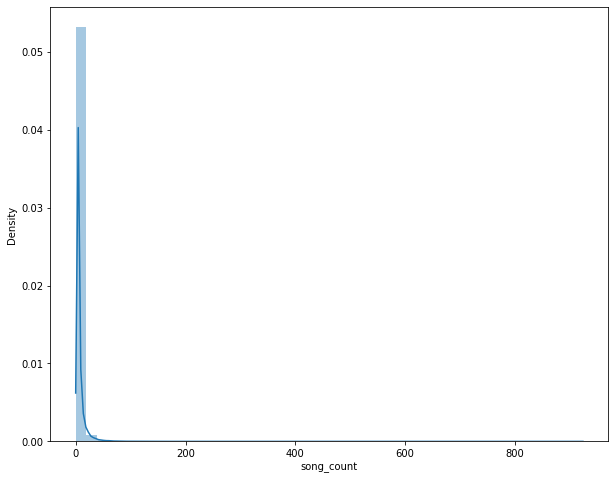

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(songs_df['song_count'])

In [ ]:
###Grouping data using user ID

In [ ]:
user_count = songs_df.groupby('user_id')['song_count'].sum()
user_count1 = user_count.sort_values(ascending = False).head(20)
user_count1

user_id
090b841eaf56d343a26625c2c6d08b823927bc4f    1305
938c2632d43eeadb8a83a7cc254d014f9cea6afe    1267
1c5aa998482a40abfd020759e7d757eb6c510e72    1200
c6150292374fb1dad89982367b3245dd5004c718    1192
5a9375e46a7e9b869058c7bc0e820e00d77f3e0b    1184
d1d845a92cd34456423e781512bdb502ca385b51    1180
957440a77858369fb7a6bcc6fa408fc187d5bd7b    1150
315103a41c2ced1143de0c2ba20de224800e6d89    1148
22bb29714137fa47083963c30e1a26f1bf517e7d    1141
bda891a59a96252cc0f5b1f63f2630692b490e37    1140
b51eeda3c09e2426f2e52dca8444a8c0cab6265a    1119
b371df81acfde601d157a99c50fa06f7b3f76a84    1038
9d12c30de5d9975f621f95f512699989ac544410    1001
7bb7949be3d91d27f1c5613bea01644fcad77f43     996
a1cc4d088600df2db42e6a305974675ffe8c905d     951
77867fcbd93f3bf47f478a797f3bfabb0f561ea8     926
a86e68128c6a48d3392db22ce1151a3bdccf5fcf     912
9948794b0687c0b3cd2094845cb7915d55793492     884
08879a07270b36aaa09923890b221fdef1e9849e     884
04383d89810d0113066c28b631097711d2550b04     867
Name: song_c

In [ ]:
user_count.sort_values(ascending=True).head()

user_id
219c456aaa463013ec3e08ed10ab1b5cded1a46e    5
13e24d4e0a2565607d5d1c5a734cff9c347044df    5
be8429f24fc9d4a9c629d3807948c51e7a0a2f9b    5
d431e054366a0fb5a9adf4c15728b8948857eb57    5
46081c034ec6f930d5f14c9cae5a9dfbac6ec171    5
Name: song_count, dtype: int64

In [ ]:
###groupby using song_id
song_ct = songs_df.groupby('song_id')['song_count'].sum()
song_ct1 = song_ct.sort_values(ascending = False).head(20)
song_ct1

song_id
SOBONKR12A58A7A7E0    35432
SOAUWYT12A81C206F1    33179
SOSXLTC12AF72A7F54    24359
SOFRQTD12A81C233C0    19454
SOEGIYH12A6D4FC0E3    17115
SOAXGDH12A8C13F8A1    14279
SONYKOW12AB01849C9    12392
SOVDSJC12A58A7A271    11610
SOUFTBI12AB0183F65    10794
SOHTKMO12AB01843B0    10515
SOPUCYA12A8C13A694     9921
SOOFYTN12A6D4F9B35     9685
SOBOUPA12A6D4F81F1     8972
SODJWHY12A8C142CCE     8718
SOLFXKT12AB017E3E0     8093
SOTCMDJ12A6D4F8528     7969
SOFLJQZ12A6D4FADA6     7895
SOTWNDJ12A8C143984     7331
SOUVTSM12AC468F6A7     7210
SOUNZHU12A8AE47481     7052
Name: song_count, dtype: int64

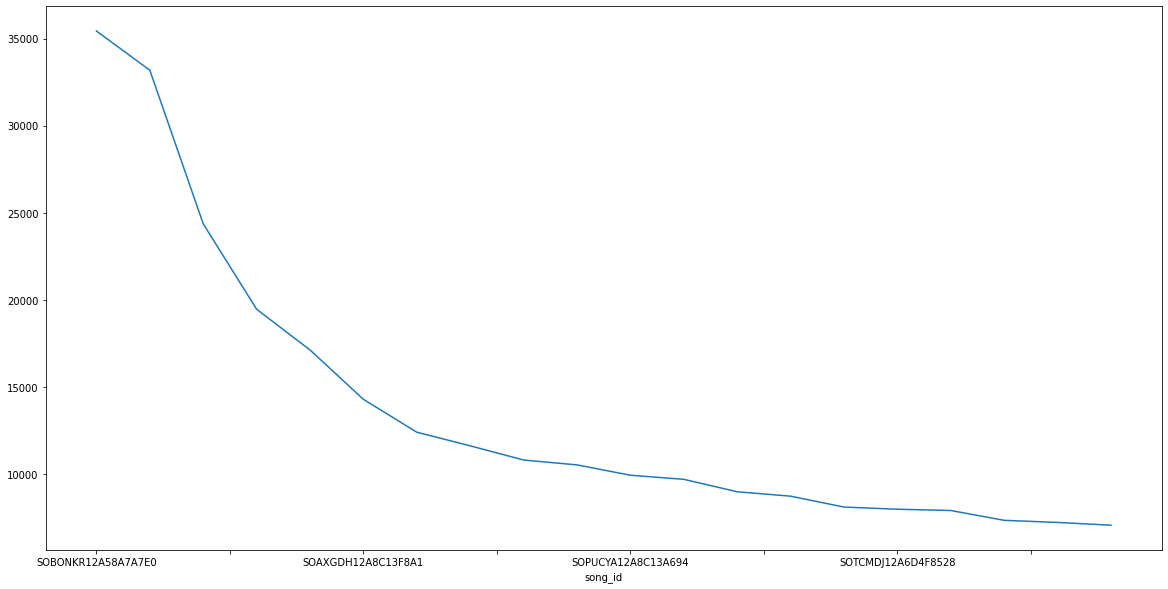

In [ ]:
song_ct1.plot(kind="line",figsize=(20,10))

In [ ]:
###Popular artist

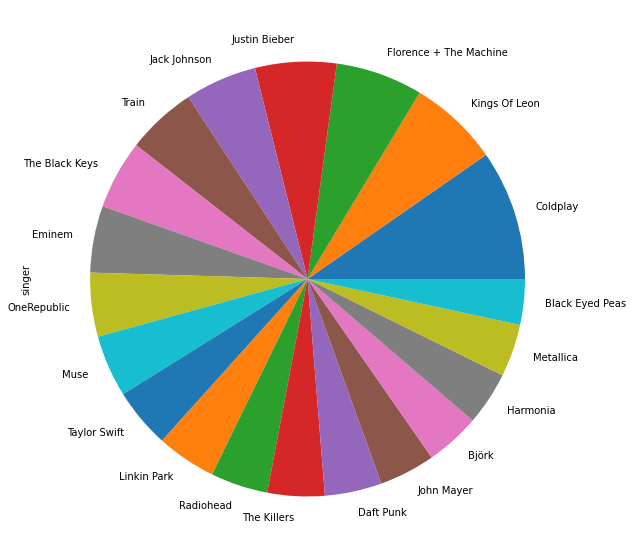

In [ ]:
pop_art = songs_df.loc[:,'singer'].value_counts()[:20] 
pop_art.plot(kind="pie",figsize=(20,10),stacked = True)

In [ ]:
artist = songs_df.groupby('singer')['song_count'].sum()
artist1 = artist.sort_values(ascending=False).head(20)
artist1

singer
Kings Of Leon                                                             35857
Dwight Yoakam                                                             35688
Björk                                                                     35210
Coldplay                                                                  32135
Florence + The Machine                                                    28224
Justin Bieber                                                             26133
Alliance Ethnik                                                           21603
Train                                                                     21356
OneRepublic                                                               20802
Harmonia                                                                  19461
Jack Johnson                                                              18333
Linkin Park                                                               18256
Eminem                           

In [ ]:
artist.sort_values(ascending=True).head()

singer
Özlem Tekin            1
Freeway / Rick Ross    1
Bjørn Afzelius         1
Bjørn Berge            1
Scott Reeder           1
Name: song_count, dtype: int64

In [ ]:

title = songs_df.groupby('song_name')['song_count'].sum()
title1 = title.sort_values(ascending = False).head(20)
title1

song_name
You're The One                                                         35738
Undo                                                                   33179
Revelry                                                                24359
Sehr kosmisch                                                          19454
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    17115
Dog Days Are Over (Radio Edit)                                         14279
Secrets                                                                12492
Ain't Misbehavin                                                       11610
Invalid                                                                10794
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   10515
Canada                                                                  9927
Représente                                                              9685
Sincerité Et Jalousie                                             

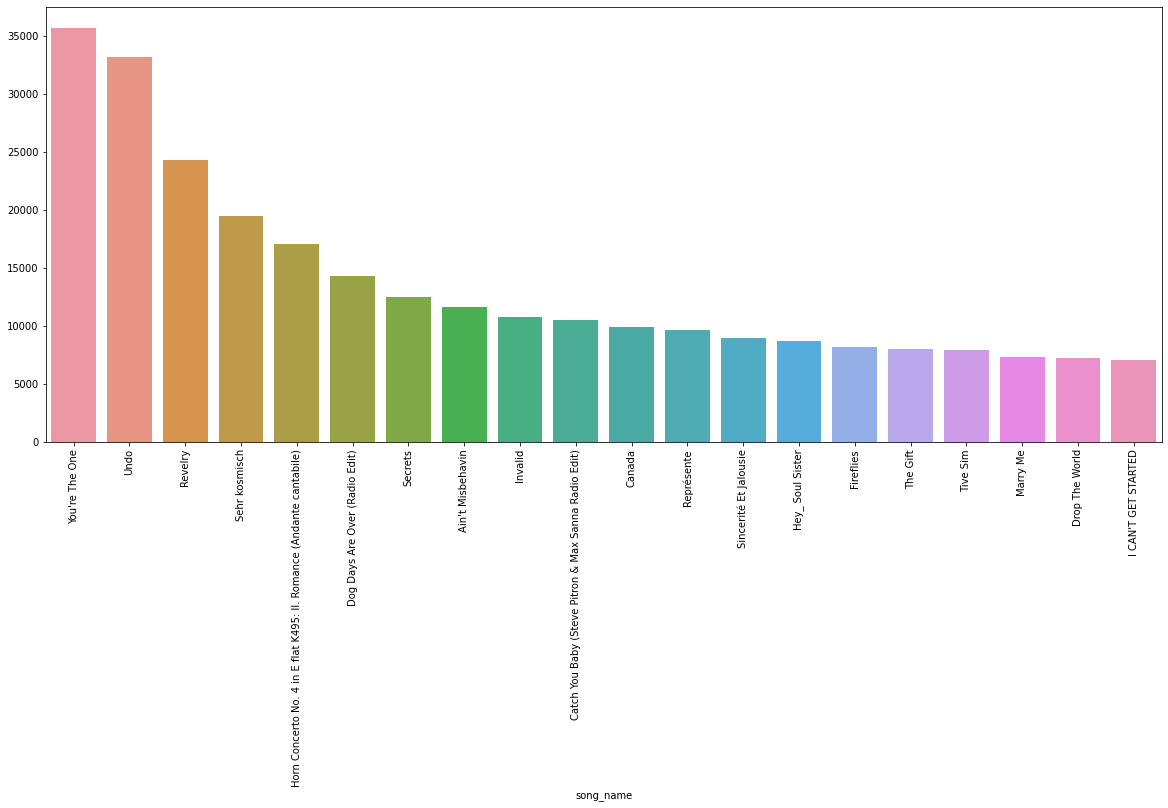

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(title1.index,title1.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
pop1_art = songs_df['singer']=='Kings Of Leon'
pop_1 = songs_df[pop1_art]
a = pop_1['song_name'].unique()
print(a)
print("Number of songs created by King of Leon:",len(a))

['Genius' 'Revelry' 'Use Somebody' 'Knocked Up' 'Closer'
 "Molly's Chambers" 'Ragoo' 'Dusty' 'Manhattan' 'Camaro' 'I Want You'
 'Cold Desert' 'Holy Roller Novocaine' 'Arizona' 'McFearless'
 'Be Somebody' 'Day Old Blues' 'Rememo' 'Happy Alone' 'King Of The Rodeo'
 'Milk' 'Pistol Of Fire' 'The Runner' 'Velvet Snow' "Joe's Head" 'Charmer'
 'California Waiting' 'Trunk' 'Trani' 'Where Nobody Knows' 'Fans'
 'Slow Night_ So Long' 'Soft' 'Razz' 'Taper Jean Girl' 'Black Thumbnail'
 'Beneath The Surface' 'Frontier City' 'Four Kicks']
Number of songs created by King of Leon: 39


In [ ]:
max_art = songs_df[['singer','song_count']].groupby('singer').mean().sort_values(by='song_count',ascending=False)[:10]
max_art

,song_count
singer,
Kilgore,462.0
Merle Travis And Joe Maphis,131.0
The Family Stand,125.0
Giuseppe Di Stefano,117.0
Mousse T.,112.0
The Gossip / Tracy and the Plastics,105.0
Ruddy Thomas & Welton Irie,87.0
Hairy Diamond,85.5
Electrocute (featuring Paul Pm),84.0


In [ ]:
#songs heard by top user
top_user = songs_df[songs_df['user_id']== '7d90be8dfdbde170f036ce8a4b915440137cb11c']
top_user.sort_values(by='singer')

,user_id,song_id,song_count,track_id,singer,song_name
259608,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOVFEGN12AF72A3369,1,TRXNPTX12903CE1090,A.A. Bondy,Killed Myself When I Was Young
259602,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOQBYQC12A8C143F2A,1,TRNBPFK128F92CFB26,Alceu Valença,No Balanço Da Canoa
259582,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOKXERP12A6D4F9895,1,TRREFSQ128F1498B40,Ana Caram,Overjoyed / Ancora
259621,7d90be8dfdbde170f036ce8a4b915440137cb11c,SODHITM12A58A79070,1,TREZJNK128F1473B62,Baby Huey & The Baby Sitters,Listen To Me (LP Version)
259593,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOPRYVX12AF72A5B7F,1,TRMTVDJ12903D13444,Bad Manners,Special Brew
259581,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOECRTE12A8C14296D,1,TRAWLYF128F92D9EE0,Blue October,Blue Skies
259591,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOGYTIV12A6D4FBF10,1,TRKNCMX128F930668C,Carla Bruni,Promises Like Pie-Crust (Album)
259598,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTGHQR12A8C1406C5,1,TRKXSKY128F42BADA6,Chris Bathgate,Coda
259579,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTIFKV12A6D4FAD83,2,TRVBZOJ128F14867D3,D-Flame Feat. Wayne Marshall,Call Me Crazy
259620,7d90be8dfdbde170f036ce8a4b915440137cb11c,SODZVMN12AC3DF81C6,1,TRKYXBC12903CF7A88,Datarock,Give It Up (Kissy Sell Out's 4x4 Cello Mix)


In [ ]:
### Creating Popularity based Recommendation System:

In [ ]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
        print(train_data_grouped)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)
        print(self.popularity_recommendations)
    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [ ]:
pr = popularity_recommender_py()
song_df = songs_df.head(10000)

In [ ]:
pr.create(songs_df,'user_id','song_name')

                                                song_name  score
0                                  Ef Ég Hefði Aldrei...      1
1                                     Light Mass Prayers      4
2       The Arsonist Story":  Evil Craves Attention/O...      1
3                                      Ég Átti Gráa Æsku      4
4                                     (Jack The Stripper)      2
...                                                   ...    ...
137617                                      Þú ert jörðin      2
137618                                       Þú ert sólin      2
137619                                 ça Me Fait Du Bien      2
137620                                     étienne d'août      4
137621                         þetta Gerist á Bestu Bæjum      1

[137622 rows x 2 columns]
                                                song_name  score  Rank
98812                                       Sehr kosmisch   5043   1.0
125393                                             

In [ ]:
users = songs_df['user_id'].unique()
user_id = users[20]
pr.recommend(user_id)

,user_id,song_name,score,Rank
98812,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Sehr kosmisch,5043,1.0
125393,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Undo,4483,2.0
136066,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,You're The One,4270,3.0
28716,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Dog Days Are Over (Radio Edit),3780,4.0
93984,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Revelry,3672,5.0
98585,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Secrets,3456,6.0
49061,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,7.0
47683,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Hey_ Soul Sister,2791,8.0
37656,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Fireflies,2745,9.0
121358,4b9b549e84fb29bfbcf7ab34f01c0bcd1bbf93a5,Tive Sim,2669,10.0


In [ ]:
user_id = users[150]
pr.recommend(user_id)

,user_id,song_name,score,Rank
98812,0bc51331375641805f2a097471b604d175004aca,Sehr kosmisch,5043,1.0
125393,0bc51331375641805f2a097471b604d175004aca,Undo,4483,2.0
136066,0bc51331375641805f2a097471b604d175004aca,You're The One,4270,3.0
28716,0bc51331375641805f2a097471b604d175004aca,Dog Days Are Over (Radio Edit),3780,4.0
93984,0bc51331375641805f2a097471b604d175004aca,Revelry,3672,5.0
98585,0bc51331375641805f2a097471b604d175004aca,Secrets,3456,6.0
49061,0bc51331375641805f2a097471b604d175004aca,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,7.0
47683,0bc51331375641805f2a097471b604d175004aca,Hey_ Soul Sister,2791,8.0
37656,0bc51331375641805f2a097471b604d175004aca,Fireflies,2745,9.0
121358,0bc51331375641805f2a097471b604d175004aca,Tive Sim,2669,10.0


Recommendation System - Using Turicreate Library

In [ ]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 1.2MB/s 
     |████████████████████████████████| 86.4MB 40kB/s 
     |████████████████████████████████| 327kB 52.4MB/s 
     |████████████████████████████████| 3.6MB 46.5MB/s 
     |████████████████████████████████| 3.5MB 42.5MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 2.9MB 43.0MB/s 
     |████████████████████████████████| 450kB 45.7MB/s 
     |████████████████████████████████| 3.8MB 32.9MB/s 
     |████████████████████████████████| 18.3MB 203kB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320858 sha256=f83579d274b89353b371870cb6915b0497821149eac4e481f95f08d3f51b4fa1
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13716 sha256=4758dd04b188fb7e411f77b0b86cd96e8538d652e05158ba1b3e06cc2dd6ceff
  Stored in directory

In [ ]:
import turicreate as tc

In [ ]:
songs_df

,user_id,song_id,song_count,track_id,singer,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
...,...,...,...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla


In [ ]:
songs_df.columns

Index(['user_id', 'song_id', 'song_count', 'track_id', 'singer', 'song_name'], dtype='object')

In [ ]:
songs_sf = tc.SFrame(songs_df[['song_id','singer','user_id','song_count','song_name']])

In [ ]:
songs_sf

song_id,singer,user_id,song_count,song_name
SOBONKR12A58A7A7E0,Dwight Yoakam,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,1,You're The One
SOEGIYH12A6D4FC0E3,Barry Tuckwell/Academy ofSt Martin-in-the- ...,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,1,Horn Concerto No. 4 in Eflat K495: II. Romance ...
SOFLJQZ12A6D4FADA6,Cartola,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,1,Tive Sim
SOHTKMO12AB01843B0,Lonnie Gordon,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,1,Catch You Baby (StevePitron & Max Sanna Radio ...
SODQZCY12A6D4F9D11,Miguel Calo,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,1,El Cuatrero
SOXLOQG12AF72A2D55,Beastie Boys,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,1,Unite (2009 DigitalRemaster) ...
SOUVUHC12A67020E3B,Moby,d7083f5e1d50c264277d624340edaaf3dc16095b ...,1,Lift Me Up
SOUQERE12A58A75633,Guano Apes,d7083f5e1d50c264277d624340edaaf3dc16095b ...,1,Living In A Lie
SOIPJAX12A8C141A2D,Guano Apes,d7083f5e1d50c264277d624340edaaf3dc16095b ...,1,Open Your Eyes
SOEFCDJ12AB0185FA0,UDG,d7083f5e1d50c264277d624340edaaf3dc16095b ...,2,Kurtizana


In [ ]:
users = songs_sf['user_id'].unique()
len(users)

110000

In [ ]:
len(songs_sf['user_id'])

1450932

## Popularity Based Recommender System:

In [ ]:
train_data,test_data = songs_sf.random_split(.8,seed=0)

In [ ]:
popularity_model = tc.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song_name')

Warning: Ignoring columns song_id, singer, song_count;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 1160637 observations with 109993 users and 126345 items.

Data prepared in: 1.29215s

1160637 observations to process; with 126345 unique items.

In [ ]:
popularity_model.recommend(users=[users[0]])

user_id,song_name,score,rank
f39aebba18b8aa460a13df66182505f18c90749f ...,Sehr kosmisch,4065.0,1
f39aebba18b8aa460a13df66182505f18c90749f ...,Undo,3590.0,2
f39aebba18b8aa460a13df66182505f18c90749f ...,You're The One,3402.0,3
f39aebba18b8aa460a13df66182505f18c90749f ...,Dog Days Are Over (RadioEdit) ...,3067.0,4
f39aebba18b8aa460a13df66182505f18c90749f ...,Revelry,2986.0,5
f39aebba18b8aa460a13df66182505f18c90749f ...,Secrets,2769.0,6
f39aebba18b8aa460a13df66182505f18c90749f ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,2602.0,7
f39aebba18b8aa460a13df66182505f18c90749f ...,Hey_ Soul Sister,2212.0,8
f39aebba18b8aa460a13df66182505f18c90749f ...,Fireflies,2185.0,9
f39aebba18b8aa460a13df66182505f18c90749f ...,Tive Sim,2116.0,10


In [ ]:
popularity_model.recommend(users=[users[56]])

user_id,song_name,score,rank
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Sehr kosmisch,4065.0,1
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,You're The One,3402.0,2
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Dog Days Are Over (RadioEdit) ...,3067.0,3
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Revelry,2986.0,4
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Secrets,2769.0,5
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,2602.0,6
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Hey_ Soul Sister,2212.0,7
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Fireflies,2185.0,8
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,Tive Sim,2116.0,9
8c7e4145f4a1891006f848f941dc160eb1fdc8b6 ...,OMG,1813.0,10


## Data Preparation for collabaritive filtering

In [ ]:
song=songs_df.drop_duplicates(['user_id','song_name','singer'])
song = song.reset_index(drop=True)

In [ ]:
song=song.iloc[0:100000,]
song.shape

(100000, 6)

In [ ]:
train_data = tc.SFrame(song)  # Data needs to be converted to SFrame format
train, test = tc.recommender.util.random_split_by_user(train_data, user_id='user_id', item_id='song_name')


Build a collaborative filtering model and get the recommendation results of the training set

Item based Approach

In [ ]:
#training the model
item_sim_model = tc.item_similarity_recommender.create(train, user_id='user_id', item_id='song_name', target='song_count', similarity_type='cosine')

# making recommendations
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)


Warning: Ignoring columns song_id, track_id, singer;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 97454 observations with 7527 users and 36939 items.

Data prepared in: 0.152542s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.426ms                        | 13.25      |

| 4.374ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.62s                               | 0                | 0               |

| 12.78s                              | 100              | 36939           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 13.8307s

+---------+-------------------------------+------------------------+------+
| user_id |           song_name           |         score          | rank |
+---------+-------------------------------+------------------------+------+
|    1    |        Just Like Eddie        | 0.00041526436805725095 |  1   |
|    1    | Chew Me Up and Spit Me Out... | 0.00041526436805725095 |  2   |
|    1    |   Will You (Single Version)   | 0.00041526436805725095 |  3   |
|    1    | Shit On The Radio (Remembe... | 0.00041526436805725095 |  4   |
|    1    |         I'm Not Jesus         | 0.0004094862937927246  |  5   |
|    2    |        Just Like Eddie        | 0.00041526436805725095 |  1   |
|    2    | Chew Me Up and Spit Me Out... | 0.00041526436805725095 |  2   |
|    2    |   Will You (Single Version)   | 0.00041526436805725095 |  3   |
|    2    | Shit On The Radio (Remembe... | 0.00041526436805725095 |  4   |
|    2    |         I'm Not Jesus         | 0.0004094862937927246  |  5   |
|    3    | 

Using Pearson

In [ ]:
#training the model and predicting using pearson 
item_sim_model = tc.item_similarity_recommender.create(train, user_id='user_id', item_id='song_name', target='song_count', similarity_type='pearson')

# making recommendations
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)


Warning: Ignoring columns song_id, track_id, singer;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 97454 observations with 7527 users and 36939 items.

Data prepared in: 0.148767s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.508ms                        | 13.25      |

| 19.042ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 958.339ms                           | 0                | 0               |

| 11.07s                              | 100              | 36939           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 11.1s

+---------+-------------------------------+-------+------+
| user_id |           song_name           | score | rank |
+---------+-------------------------------+-------+------+
|    1    |      Keep the Party Alive     | 355.0 |  1   |
|    1    |        Handfuls Of Sky        | 354.0 |  2   |
|    1    |           Get On It           | 281.0 |  3   |
|    1    |              Toff             | 245.0 |  4   |
|    1    | Mentobe (Explicit LP Version) | 244.0 |  5   |
|    2    |      Keep the Party Alive     | 355.0 |  1   |
|    2    |        Handfuls Of Sky        | 354.0 |  2   |
|    2    |           Get On It           | 281.0 |  3   |
|    2    |              Toff             | 245.0 |  4   |
|    2    | Mentobe (Explicit LP Version) | 244.0 |  5   |
|    3    |      Keep the Party Alive     | 355.0 |  1   |
|    3    |        Handfuls Of Sky        | 354.0 |  2   |
|    3    |           Get On It           | 281.0 |  3   |
|    3    |              Toff             | 245.0 |  4  

In [ ]:
item_sim_model.evaluate_precision_recall(test)

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 15210
 
 Data:
 +-------------------------------+--------+-----------+--------+-------+
 |            user_id            | cutoff | precision | recall | count |
 +-------------------------------+--------+-----------+--------+-------+
 | 05b9035fe02ebdf5535ae9ec07... |   1    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   2    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   3    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   4    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   5    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   6    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   7    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   8    |    0.0    |  0.0   |   2   |
 | 05b9035fe02ebdf5535ae9ec07... |   9    |    0.0    |  0.0   

User Based Approach